In [27]:
import scanpy as sc
import seaborn as sns
import pandas as pd

In [16]:
from lets_plot import *
LetsPlot.setup_html()

In [2]:
sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=120,
    facecolor="white",
    frameon=False,
)

In [3]:
adata = sc.datasets.ebi_expression_atlas('E-MTAB-10885')

In [4]:
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_genes=200)

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [6]:
sc.pp.pca(adata)

In [7]:
sc.pp.neighbors(adata)

/Users/zafer.kosar/dev3/scmore/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
adata.shape

(22063, 20841)

In [9]:
adata.var_names_make_unique()
adata.shape

(22063, 20841)

In [10]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))

In [11]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata

AnnData object with n_obs × n_vars = 22063 × 20841
    obs: 'Sample Characteristic[organism]', 'Sample Characteristic Ontology Term[organism]', 'Sample Characteristic[individual]', 'Sample Characteristic Ontology Term[individual]', 'Sample Characteristic[sex]', 'Sample Characteristic Ontology Term[sex]', 'Sample Characteristic[age]', 'Sample Characteristic Ontology Term[age]', 'Sample Characteristic[developmental stage]', 'Sample Characteristic Ontology Term[developmental stage]', 'Sample Characteristic[phenotype]', 'Sample Characteristic Ontology Term[phenotype]', 'Sample Characteristic[disease]', 'Sample Characteristic Ontology Term[disease]', 'Sample Characteristic[parity]', 'Sample Characteristic Ontology Term[parity]', 'Sample Characteristic[infant age]', 'Sample Characteristic Ontology Term[infant age]', 'Sample Characteristic[organism part]', 'Sample Characteristic Ontology Term[organism part]', 'Sample Characteristic[cell type]', 'Sample Characteristic Ontology Term[cell type]'

In [12]:
sc.tl.umap(adata)
sc.tl.leiden(adata)

/var/folders/4c/fcxlqxc9641fxb8yx65cxfgm0000gp/T/ipykernel_22703/1561440278.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


In [39]:
adata.obs["leiden"] 

ERR6548285-AAAACTCGTTATGTGC    11
ERR6548285-AAACCTATCTCCAACC     0
ERR6548285-AAACCTGAGAAGGACA    11
ERR6548285-AAACCTGAGACAAGCC     0
ERR6548285-AAACCTGAGAGGTTAT     0
                               ..
ERR6548288-TTTGTCATCATTGCGA     1
ERR6548288-TTTGTCATCGACAGCC     8
ERR6548288-TTTGTCATCTCACATT     8
ERR6548288-TTTGTCATCTCGGACG    16
ERR6548288-TTTGTCATCTGCTTGC    16
Name: leiden, Length: 22063, dtype: category
Categories (21, object): ['0', '1', '2', '3', ..., '17', '18', '19', '20']

In [68]:
umaps = pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'])
umaps.set_index(adata.obs.index, inplace=True)
umaps.head()

,UMAP1,UMAP2
ERR6548285-AAAACTCGTTATGTGC,-0.462395,5.412889
ERR6548285-AAACCTATCTCCAACC,-3.173378,10.844032
ERR6548285-AAACCTGAGAAGGACA,-3.230483,5.212194
ERR6548285-AAACCTGAGACAAGCC,-3.772189,9.620877
ERR6548285-AAACCTGAGAGGTTAT,-3.255329,10.251563


In [70]:
obs = adata.obs
obs.head()

,Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Sample Characteristic[age],Sample Characteristic Ontology Term[age],Sample Characteristic[developmental stage],Sample Characteristic Ontology Term[developmental stage],...,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,leiden
ERR6548285-AAAACTCGTTATGTGC,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,HMC9,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,33 year,NaN,adult,http://www.ebi.ac.uk/efo/EFO_0001272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
ERR6548285-AAACCTATCTCCAACC,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,HMC9,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,33 year,NaN,adult,http://www.ebi.ac.uk/efo/EFO_0001272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
ERR6548285-AAACCTGAGAAGGACA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,HMC9,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,33 year,NaN,adult,http://www.ebi.ac.uk/efo/EFO_0001272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
ERR6548285-AAACCTGAGACAAGCC,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,HMC9,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,33 year,NaN,adult,http://www.ebi.ac.uk/efo/EFO_0001272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
ERR6548285-AAACCTGAGAGGTTAT,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,HMC9,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,33 year,NaN,adult,http://www.ebi.ac.uk/efo/EFO_0001272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [73]:
obsu = pd.concat([obs, umaps], axis=1)
obsu.head()

,Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Sample Characteristic[age],Sample Characteristic Ontology Term[age],Sample Characteristic[developmental stage],Sample Characteristic Ontology Term[developmental stage],...,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,leiden,UMAP1,UMAP2
ERR6548285-AAAACTCGTTATGTGC,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,HMC9,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,33 year,NaN,adult,http://www.ebi.ac.uk/efo/EFO_0001272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,-0.462395,5.412889
ERR6548285-AAACCTATCTCCAACC,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,HMC9,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,33 year,NaN,adult,http://www.ebi.ac.uk/efo/EFO_0001272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-3.173378,10.844032
ERR6548285-AAACCTGAGAAGGACA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,HMC9,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,33 year,NaN,adult,http://www.ebi.ac.uk/efo/EFO_0001272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,-3.230483,5.212194
ERR6548285-AAACCTGAGACAAGCC,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,HMC9,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,33 year,NaN,adult,http://www.ebi.ac.uk/efo/EFO_0001272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-3.772189,9.620877
ERR6548285-AAACCTGAGAGGTTAT,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,HMC9,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,33 year,NaN,adult,http://www.ebi.ac.uk/efo/EFO_0001272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-3.255329,10.251563


In [93]:
ax = (
    ggplot(obsu,aes(x='UMAP1',y='UMAP2',color='leiden')) +
    geom_point(size=0.7)+
    scale_color_hue()+
    theme_void()

)
ax

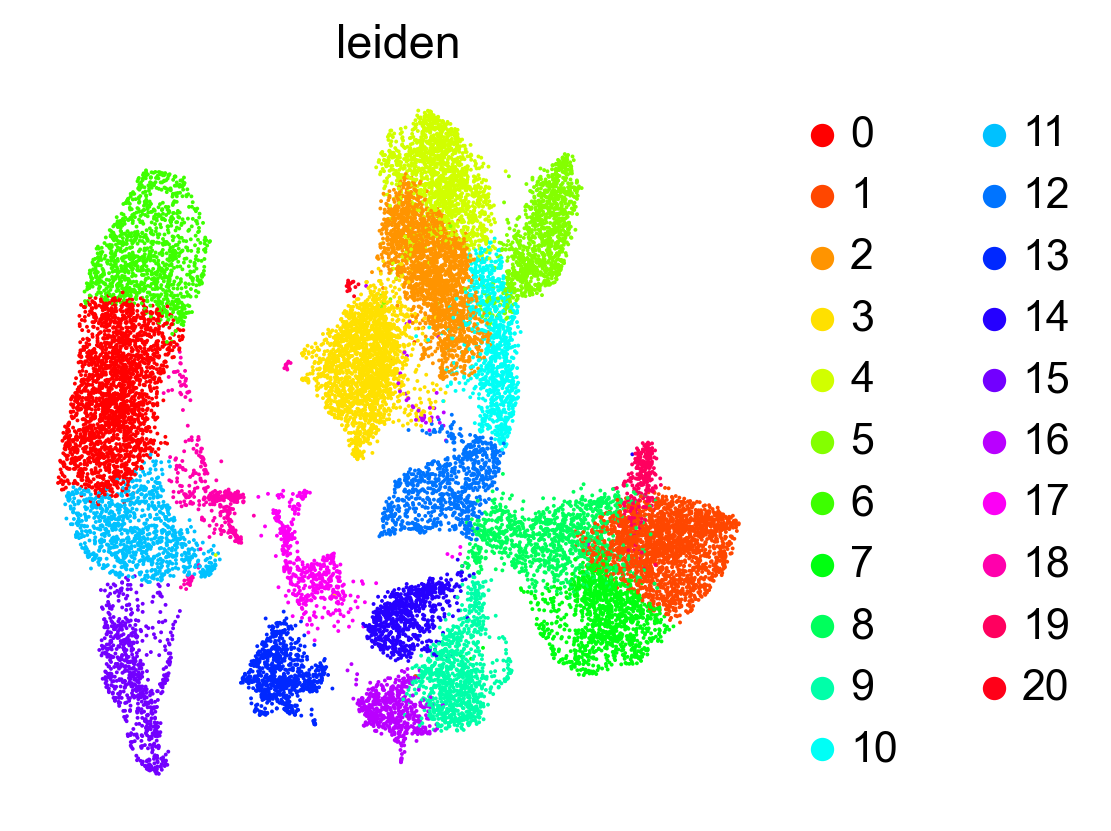

In [87]:
sc.pl.umap(adata, color=["leiden"])